In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle
import numpy as np

In [2]:
import pandas as pd

data=pd.read_csv('df_fin.csv')

In [3]:
from konlpy.tag import Okt
from nltk.tokenize import word_tokenize 
import re
okt=Okt()

In [4]:
stopwords='아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'

stopwords=stopwords.split(' ')

In [5]:
lists=[]
for i in range(len(data['Date'])):
    text=data.iloc[i]['기사제목']
    text=re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]','',text)
    text = re.sub(r'\d+','',text)# remove number
    text = text.lower() #lower case
    text = re.sub(r'\s+', ' ', text) #remove extra space
    text = re.sub(r'<[^>]+>','',text) #remove Html tags
    text = re.sub(r'\s+', ' ', text) #remove spaces
    text = re.sub(r"^\s+", '', text) #remove space from start
    text = re.sub(r'\s+$', '', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result=hangul.sub('',text)
    if result not in stopwords:
        results=okt.morphs(result)
        lists.append(results)
        
    
data['형태소분석']=lists

In [6]:
news_title=data['형태소분석']

In [7]:
news_list=[]
for i in range(len(news_title)):
    list1=[]
    for j in range(len(news_title[i])):
        list1.append(news_title[i][j])
    news_list.append(' '.join(list1))
news_list

['낡은 규 제혁 파세계 최고 상속 세율 기업인 에 사망 선고 재계 상속 세율',
 '낡은 규 제혁 파 암세포 같은 낡은 규제 가 한국 경제 혁신 막는다',
 '머리카락 배 얇은 초 박막 렌즈 개발 스마트폰 카툭 튀 없앤다',
 '월 효과 연말 랠리 잇는다 증권 가 실적 개선 경기 민감 주목',
 '낡은 규 제혁 파세계 최고 상속 세율 기업인 에 사망 선고 재계 상속 세율',
 '갤럭시 이번 엔 티저 영상 유출 새로운 갤럭시 가 기다리고 있다',
 '밑줄 쫙 국정 농단 대미 장식 특검 이재용 에 징역 년 구형',
 '코스피 시 총 사상 최초 넘어선 듯 삼전 조원 증가',
 '경제 기상도 코로나 에 갇혔던 경제 소의 뿔 처럼 저돌 적 돌파 기대',
 '반도체 메모리 값 강세 지 속 파운드리 수요 도 늘듯',
 '디스플레이 더 선명해진 프리미엄 시장 선점',
 '가전 집콕 수혜 백색 가전 상반기 까지 돌풍 예고',
 '스마트폰 중 저가 폰 라인업 확대 두 자릿수 성장 노려',
 '애플 폰 출시 두 달새 삼성 판매량 추월',
 '주식 부호 조 클럽 명 김범수 카카오 의장 순위 껑충',
 '장기 자의 비사 이드 크리스마스 는 아이폰 이 접수',
 '애플 카 전자 의 야심작 롤러 블 이 달 첫 선 어떻게 생겼나',
 '슈퍼 리치 재테크 스타 가 조언 하는 올해 주목 할 테마',
 '품질 로 경쟁 선언 반년 만에 명칭 놓고 삼성 신 경전',
 '대 그룹 시무 식 일 온라인 개최 이재용 신년사 없을 듯',
 '장기 자의 비사 이드 크리스마스 는 아이폰 이 접수',
 '주목 스몰 캡 살아나는 반도체 업황 기회 찾아온 아이 원스',
 '유 안타 주간 추천 주 매출 반등 예상 삼 성전 자 아모레퍼시픽 엔씨 소프',
 '단독 주린이 삼성로 몰리나 현대차 배터리 공급 후보 낙점',
 '삼성 전자 여전히 저 평가 전문가 새해 톱픽 추천',
 '삼성 패스 로 연말정산 을 전자서명 시장 본격 진출',
 '국내 가입자 천만 명 돌파 올해 대중화 단계',
 '펀드 와 치 사상 최고 치 코스

In [8]:
title_text = ''

for each_line in news_list:
    title_text = title_text + each_line + '\n'
    
title_text

'낡은 규 제혁 파세계 최고 상속 세율 기업인 에 사망 선고 재계 상속 세율\n낡은 규 제혁 파 암세포 같은 낡은 규제 가 한국 경제 혁신 막는다\n머리카락 배 얇은 초 박막 렌즈 개발 스마트폰 카툭 튀 없앤다\n월 효과 연말 랠리 잇는다 증권 가 실적 개선 경기 민감 주목\n낡은 규 제혁 파세계 최고 상속 세율 기업인 에 사망 선고 재계 상속 세율\n갤럭시 이번 엔 티저 영상 유출 새로운 갤럭시 가 기다리고 있다\n밑줄 쫙 국정 농단 대미 장식 특검 이재용 에 징역 년 구형\n코스피 시 총 사상 최초 넘어선 듯 삼전 조원 증가\n경제 기상도 코로나 에 갇혔던 경제 소의 뿔 처럼 저돌 적 돌파 기대\n반도체 메모리 값 강세 지 속 파운드리 수요 도 늘듯\n디스플레이 더 선명해진 프리미엄 시장 선점\n가전 집콕 수혜 백색 가전 상반기 까지 돌풍 예고\n스마트폰 중 저가 폰 라인업 확대 두 자릿수 성장 노려\n애플 폰 출시 두 달새 삼성 판매량 추월\n주식 부호 조 클럽 명 김범수 카카오 의장 순위 껑충\n장기 자의 비사 이드 크리스마스 는 아이폰 이 접수\n애플 카 전자 의 야심작 롤러 블 이 달 첫 선 어떻게 생겼나\n슈퍼 리치 재테크 스타 가 조언 하는 올해 주목 할 테마\n품질 로 경쟁 선언 반년 만에 명칭 놓고 삼성 신 경전\n대 그룹 시무 식 일 온라인 개최 이재용 신년사 없을 듯\n장기 자의 비사 이드 크리스마스 는 아이폰 이 접수\n주목 스몰 캡 살아나는 반도체 업황 기회 찾아온 아이 원스\n유 안타 주간 추천 주 매출 반등 예상 삼 성전 자 아모레퍼시픽 엔씨 소프\n단독 주린이 삼성로 몰리나 현대차 배터리 공급 후보 낙점\n삼성 전자 여전히 저 평가 전문가 새해 톱픽 추천\n삼성 패스 로 연말정산 을 전자서명 시장 본격 진출\n국내 가입자 천만 명 돌파 올해 대중화 단계\n펀드 와 치 사상 최고 치 코스피 레버리지 펀드 껑충\n국내 가입자 천만 명 돌파 제재 로 새해 폰 애플 위\n주 간증 시 전망 어 닝 시즌 진입 월 효과 시동 걸까\n이재용 부

In [9]:
tokens_ko = okt.morphs(title_text)

In [10]:
import nltk
ko = nltk.Text(tokens_ko)
ko

<Text: 낡은 규 제혁 파세계 최고 상속 세율 기업인...>

In [11]:
print(len(ko.tokens))          # 토큰 전체 개수
print(len(set(ko.tokens))) 

60958
8395


In [12]:
# 빈도수가 높은 단어 출력

ko.vocab().most_common(200)

[('\n', 5482),
 ('삼성', 1830),
 ('전자', 1155),
 ('에', 1009),
 ('반도체', 581),
 ('코스피', 518),
 ('이재용', 377),
 ('의', 376),
 ('이', 330),
 ('한', 291),
 ('가', 275),
 ('투자', 265),
 ('선', 261),
 ('도', 259),
 ('은', 258),
 ('성', 256),
 ('로', 249),
 ('는', 246),
 ('주', 237),
 ('대', 234),
 ('삼', 234),
 ('위', 233),
 ('조', 231),
 ('기업', 225),
 ('년', 209),
 ('갤럭시', 206),
 ('만', 204),
 ('마감', 176),
 ('일', 175),
 ('상승', 175),
 ('실적', 170),
 ('출시', 153),
 ('기관', 145),
 ('장', 144),
 ('포토', 141),
 ('월', 134),
 ('들', 134),
 ('전', 134),
 ('개미', 133),
 ('서', 133),
 ('사면', 130),
 ('코로나', 129),
 ('으로', 128),
 ('분기', 127),
 ('까지', 120),
 ('하락', 120),
 ('총', 118),
 ('외국인', 118),
 ('시장', 117),
 ('순', 115),
 ('기술', 115),
 ('더', 114),
 ('매수', 113),
 ('등', 112),
 ('와', 111),
 ('한국', 110),
 ('출발', 109),
 ('자', 108),
 ('개인', 108),
 ('하이닉스', 108),
 ('폰', 104),
 ('최대', 104),
 ('과', 103),
 ('억', 103),
 ('종합', 100),
 ('최고', 99),
 ('중', 99),
 ('첫', 98),
 ('만원', 98),
 ('목표', 98),
 ('기', 98),
 ('적', 97),
 ('가전', 96),
 ('사업', 96)

In [13]:

# 불용어(stopwords) 제거하기

stop_words = ['\n',"'",'…',',','[',']','(',')','"','주','에','코스닥','특징','종목','·','장','코스피','증시','-','적',\
              '도','기술','분석','마감','‘','`','요약','가','’','의','이','오전','★','은','“','대','”','한','B','로',\
              '?','3','선','A','오후','는','5','!','"…','상','들','1','만에','제','2','…"','20','일','서','명',"'…",'기',\
              '···','10','소','등','으로','자','전','률','미','...','50','세','시','안','폭',"…'",'만','9','VI','까지',\
              '눈','더','e','량','고','인','52','성','띄네','1%','부터','다','감','을','지','4','에도','수','7','것','째',\
             '체크','기','···','중','계','관련','왜','1억원','총','내','과','젠','또','연','엔','차','굿모닝','할','8','.',\
             '보다','새','주간','전망','추천','이슈','플러스','사','개월','때','..','임','속','’…','G','나','개','원','에서',\
             '하는','이유','달','→','권','?…','단독','간','배','30','K','저','와','하','/','1조','6','두','해야','분','형',\
             '황','공','&','앞두고','보','문','이번','익','X','1억',']"','치','산','를','오','해','S','우리','그','된','준','▶',\
             '건','재','반','라','10년','초','3분','월','신','p','급','조','줄','경','했다','구','진','이어','올','발','vs','강',\
             '국','9억','1년','난','판','면','"(','`…','살','아','인데','번','텍','팜','8월','Q','메','2년','점','하고','10월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','40','타','~','9월','2100','30%','땐','말','한다','요',\
             "',",'스','…`','단','16','길','12','3억','회','될까','호','용','2조','번째','일까','듯','최']

tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('삼성', 1830),
 ('전자', 1155),
 ('반도체', 581),
 ('이재용', 377),
 ('투자', 265),
 ('삼', 234),
 ('위', 233),
 ('기업', 225),
 ('년', 209),
 ('갤럭시', 206),
 ('상승', 175),
 ('실적', 170),
 ('출시', 153),
 ('기관', 145),
 ('포토', 141),
 ('개미', 133),
 ('사면', 130),
 ('코로나', 129),
 ('분기', 127),
 ('하락', 120),
 ('외국인', 118),
 ('시장', 117),
 ('순', 115),
 ('매수', 113),
 ('한국', 110),
 ('출발', 109),
 ('개인', 108),
 ('하이닉스', 108),
 ('폰', 104),
 ('최대', 104),
 ('억', 103),
 ('종합', 100),
 ('최고', 99),
 ('첫', 98),
 ('만원', 98),
 ('목표', 98),
 ('가전', 96),
 ('사업', 96),
 ('매도', 94),
 ('올해', 93),
 ('주식', 92),
 ('외인', 91),
 ('글로벌', 89),
 ('공급', 87),
 ('주가', 87),
 ('공장', 87),
 ('스마트폰', 86),
 ('이건희', 84),
 ('대통령', 83),
 ('동학', 82),
 ('경영', 81),
 ('회장', 81),
 ('확대', 79),
 ('화', 79),
 ('영업', 79),
 ('산업', 79),
 ('애플', 78),
 ('부회장', 77),
 ('돌파', 75),
 ('지원', 75),
 ('경제', 74),
 ('파운드리', 73),
 ('세계', 72),
 ('스포크', 71),
 ('장비', 70),
 ('이데일리', 70),
 ('조원', 69),
 ('성장', 69),
 ('억원', 69),
 ('주목', 68),
 ('후', 68),
 ('인텔', 68),
 ('배당', 67),
 ('카카오',

In [14]:
import matplotlib.pyplot as plt

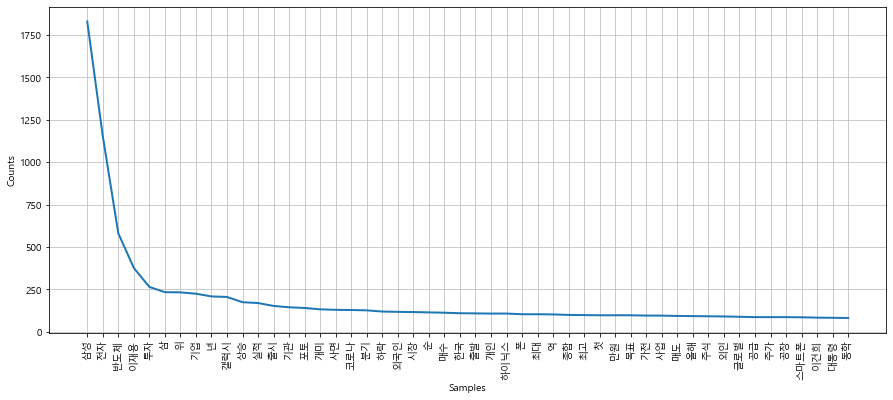

In [15]:
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import graphviz
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [16]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

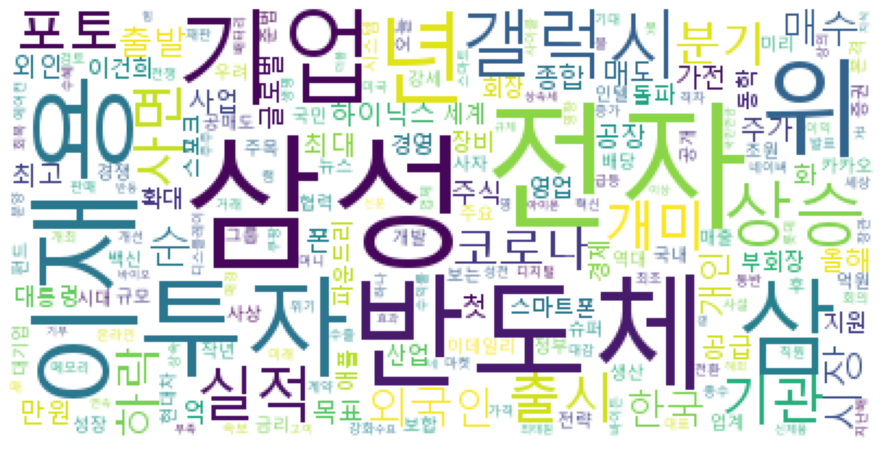

In [17]:
data2 = ko.vocab().most_common(300)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white').generate_from_frequencies(dict(data2))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
data

,Date,기사제목,Close,Change,등락구분,label,주가 반영 Date,형태소분석
0,2021-01-01,"[낡은규제혁파①]""세계 최고 상속세율, 기업인에 사망선고""…재계, 상속세율 ...",83000.0,0.024691,True,1.0,2021-01-04,"[낡은, 규, 제혁, 파세계, 최고, 상속, 세율, 기업인, 에, 사망, 선고, 재..."
1,2021-01-01,[낡은규제혁파①]암세포 같은 낡은 규제가 한국 경제 혁신 막는다,83000.0,0.024691,True,1.0,2021-01-04,"[낡은, 규, 제혁, 파, 암세포, 같은, 낡은, 규제, 가, 한국, 경제, 혁신,..."
2,2021-01-01,머리카락 100배 얇은 초박막렌즈 개발…스마트폰 `카툭튀` 없앤다,83000.0,0.024691,True,1.0,2021-01-04,"[머리카락, 배, 얇은, 초, 박막, 렌즈, 개발, 스마트폰, 카툭, 튀, 없앤다]"
3,2021-01-01,"1월효과, 연말랠리 잇는다…증권가 ""실적개선·경기민감株 주목""",83000.0,0.024691,True,1.0,2021-01-04,"[월, 효과, 연말, 랠리, 잇는다, 증권, 가, 실적, 개선, 경기, 민감, 주목]"
4,2021-01-01,"[낡은규제혁파①]""세계 최고 상속세율, 기업인에 사망선고""…재계, 상속세율 ...",83000.0,0.024691,True,1.0,2021-01-04,"[낡은, 규, 제혁, 파세계, 최고, 상속, 세율, 기업인, 에, 사망, 선고, 재..."
...,...,...,...,...,...,...,...,...
5479,2021-06-29,"삼성전자 ""美공장부지 선정 못했다""…핵심은 '칩스법'",80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 전자, 공장, 부지, 선정, 못, 했다, 핵심, 은, 칩스, 법]"
5480,2021-06-29,삼성 'SSAFY'·SK '하이파이브'…정부 지원으로 3천명+α 확대,80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 하이파이브, 정부, 지원, 으로, 천명, 확대]"
5481,2021-06-29,"삼성전자, 2Q 영업익 11조원 초반대…반도체 견인-IBK",80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 전자, 영업, 익, 조원, 초반, 대, 반도체, 견인]"
5482,2021-06-29,"삼성·LG전자, 2분기 실적도 '훨훨'…내주 잠정실적 발표",80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 전자, 분기, 실적, 도, 훨훨, 내주, 잠정, 실적, 발표]"


In [19]:
# 형태소 분석을 위한 함수

def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

In [20]:
def data_preprocessing():
    # 수집한 데이터 읽어오기
    # data=pd.read_csv('df_fin.csv')
    
    # 학습셋, 테스트셋 분리
    title_list = data['기사제목'].tolist()
    price_list = data['label'].tolist()
    
    from sklearn.model_selection import train_test_split
    
    # 데이터의 80%는 학습셋, 20%는 테스트셋
    title_train, title_test, price_train, price_test = train_test_split(news_list, price_list, test_size=0.2, random_state=0)
    
    return title_train, title_test, price_train, price_test

In [21]:
def learning(x_train, y_train, x_test, y_test):
    # 전처리가 끝난 데이터를 단어 사전으로 만들고
    # 리뷰별로 나오는 단어를 파악해서 수치화 (벡터화)해서 학습
    # tfidf, 로지스틱 회귀 이용
    
    tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)
    # 로지스틱
    logistic = LogisticRegression(C=2, penalty='l2', random_state=0)     # C의 숫자가 너무 크면 과적합 (기본 1), penalty로 과적합 방지
    
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    
    # 학습
    pipe.fit(x_train, y_train)
    
    # 학습 정확도 측정
    y_pred = pipe.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    
    # 학습한 모델을 저장
    with open('pipe.dat', 'wb') as fp:     # 쓰기, 바탕화면에 저장됨
        pickle.dump(pipe, fp)
        
    print('저장완료')     # 학습된 모델 저장 완료

In [22]:
def using():
    # 객체를 복원, 저장된 모델 불러오기
    with open('pipe.dat','rb') as fp:     # 읽기
        pipe = pickle.load(fp)
        
    while True :
        text = input('뉴스 타이틀을 입력해주세요 : ')     # 인풋
        
        str = [text]
        
        # 예측 정확도
        r1 = np.max(pipe.predict_proba(str)*100)     # 확률값을 구해서 *100..?
        
        # 예측 결과
        r2 = pipe.predict(str)[0]     # 긍정('1'), 부정('0')
        
        if r2 == 1:
            print('코스피지수는 상승할 것으로 예상됩니다.')
        else: 
            print('코스피지수는 하락할 것으로 예상됩니다.')
            
        print('정확도 : %.3f' % r1)
        print('------------------------------------------------')

In [26]:
# 학습 함수

def model_learning():   # 감성분석 모델 생성
    title_train, title_test, price_train, price_test = data_preprocessing()
    learning(title_train, price_train, title_test, price_test)
    
# 사용 함수

def model_using():   # 감성분석 모델 사용
    using()

In [27]:
model_learning()

0.601640838650866
저장완료


In [ ]:
model_using()

뉴스 타이틀을 입력해주세요 : 이재용
코스피지수는 상승할 것으로 예상됩니다.
정확도 : 83.798
------------------------------------------------
뉴스 타이틀을 입력해주세요 : 석방
코스피지수는 상승할 것으로 예상됩니다.
정확도 : 53.954
------------------------------------------------
뉴스 타이틀을 입력해주세요 : 갤럭시
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 81.025
------------------------------------------------
뉴스 타이틀을 입력해주세요 : 반도체
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 76.158
------------------------------------------------
뉴스 타이틀을 입력해주세요 : 삼성
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 50.293
------------------------------------------------
뉴스 타이틀을 입력해주세요 : 개미
코스피지수는 상승할 것으로 예상됩니다.
정확도 : 78.069
------------------------------------------------
